In [215]:
words = open("data/names.txt", "r").read().splitlines()

In [216]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [217]:
len(words)

32033

In [218]:
min(len(w) for w in words)

2

In [219]:
b = {}

for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [220]:
sorted(b.items(), key=lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [221]:
import torch

In [222]:
a = torch.zeros([3, 5], dtype=torch.int32)
a[1, 3] = 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [223]:
N = torch.zeros([27, 27], dtype=torch.int32)

In [224]:
chars = sorted(list(set("".join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0

In [225]:
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
        


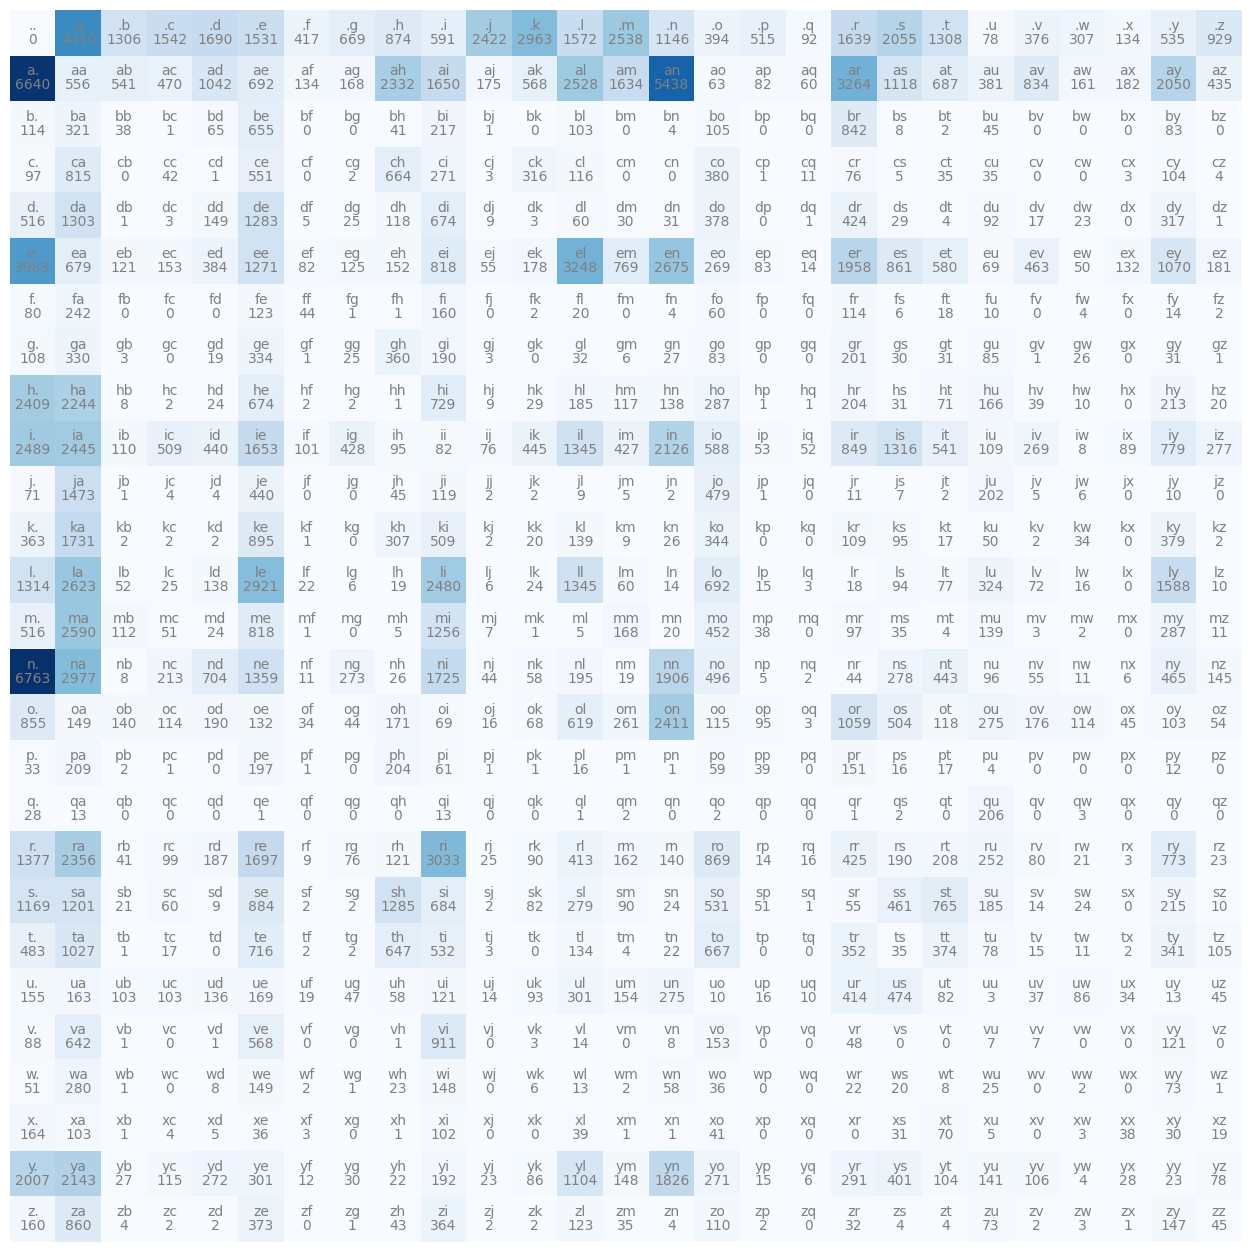

In [226]:
import matplotlib.pyplot as plt
%matplotlib inline

# inverse mapping
itos = {i:s for s,i in stoi.items()}
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');



In [227]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [238]:
# Normalize
P = (N+1).float()
P /= P.sum(1, keepdim=True)


In [241]:
log_likelihood = 0.0

n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
    
print(f'{log_likelihood=}')

nll = -log_likelihood
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
2.4543561935424805


In [242]:
g = torch.Generator().manual_seed(2147483647)

# for i in range(20):
#     out = []
#     ix = 0
#     END_TOKEN_IDX = 0

#     while True:
#         p = P[ix]
#         # p = torch.ones(27) / 27.0
#         out.append(itos[ix])
#         if ix == END_TOKEN_IDX:
#             break

#     print(''.join(out))
    

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


In [243]:
# create the training set of bigrams

xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [244]:
xs

tensor([ 0,  5, 13, 13,  1])

In [245]:
ys

tensor([ 5, 13, 13,  1,  0])

In [250]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

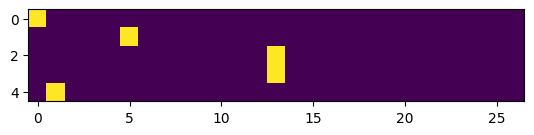

In [251]:
plt.imshow(xenc)

In [256]:
W = torch.randn(27, 27)

torch.Size([5, 27])

In [257]:
logits = xenc @  W
counts = logits.exp()

# normalize the probabilities
probs = counts / counts.sum(1, keepdim=True)
probs

tensor([[0.0387, 0.0037, 0.0252, 0.0188, 0.0222, 0.0248, 0.0226, 0.0126, 0.0281,
         0.0087, 0.0276, 0.0212, 0.0434, 0.1938, 0.0296, 0.0568, 0.0353, 0.0069,
         0.0314, 0.0798, 0.0379, 0.0319, 0.0976, 0.0140, 0.0602, 0.0073, 0.0199],
        [0.0081, 0.0036, 0.0065, 0.0637, 0.0076, 0.0163, 0.1416, 0.0101, 0.0167,
         0.0924, 0.0084, 0.0256, 0.0143, 0.0150, 0.0081, 0.0172, 0.1746, 0.0476,
         0.0159, 0.0097, 0.0085, 0.0033, 0.0417, 0.1400, 0.0388, 0.0535, 0.0111],
        [0.0060, 0.1574, 0.0466, 0.0083, 0.0289, 0.0354, 0.0370, 0.0125, 0.0239,
         0.1093, 0.0052, 0.0042, 0.0108, 0.1476, 0.0182, 0.0201, 0.0144, 0.0139,
         0.0135, 0.0145, 0.0175, 0.0144, 0.0117, 0.0149, 0.0578, 0.1443, 0.0119],
        [0.0060, 0.1574, 0.0466, 0.0083, 0.0289, 0.0354, 0.0370, 0.0125, 0.0239,
         0.1093, 0.0052, 0.0042, 0.0108, 0.1476, 0.0182, 0.0201, 0.0144, 0.0139,
         0.0135, 0.0145, 0.0175, 0.0144, 0.0117, 0.0149, 0.0578, 0.1443, 0.0119],
        [0.0177, 0.0143,

In [269]:
nlls = torch.zeros(5)

for i in range(5):
    # i-th bigram
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    p = probs[i, y]
    logp= torch.log(p)
    nll = -logp
    nlls[i] = nll

print("________")
print(f'average negative log likelihood, i.e. loss function: {nlls.mean().item()}')


________
average negative log likelihood, i.e. loss function: 3.7693049907684326


In [296]:
g = torch.Generator().manual_seed(2147483647)

W = torch.randn(27, 27, generator=g, requires_grad=True)


In [306]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W

# softmax
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
probs.shape

torch.Size([5, 27])

In [307]:
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7292, grad_fn=<NegBackward0>)

In [308]:
# backward pass
W.grad = None
loss.backward()

In [309]:
loss

tensor(3.7292, grad_fn=<NegBackward0>)

In [305]:
# update the weights
W.data += -0.1 * W.grad


In [342]:
# bring it all together
xs, ys = [], []
for word in words:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

num = xs.nelement()
g = torch.Generator().manual_seed(214783647)
W = torch.randn(27, 27, generator=g, requires_grad=True)


In [343]:

for k in range(100):
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01 * (W**2).mean()
    print(loss.item())

    W.grad = None
    loss.backward()
    W.data += -50 * W.grad


3.8054709434509277
3.4494211673736572
3.1935737133026123
3.027338981628418
2.9237582683563232
2.84977650642395
2.794086217880249
2.751512289047241
2.718487501144409
2.692307710647583
2.6710095405578613
2.6532704830169678
2.6382243633270264
2.625288486480713
2.6140525341033936
2.6042122840881348
2.595532178878784
2.587826728820801
2.5809481143951416
2.574775218963623
2.5692105293273926
2.5641729831695557
2.5595951080322266
2.555421829223633
2.551605701446533
2.5481061935424805
2.5448873043060303
2.5419201850891113
2.5391781330108643
2.536637783050537
2.5342793464660645
2.5320844650268555
2.5300371646881104
2.528123617172241
2.5263311862945557
2.524648666381836
2.5230672359466553
2.5215766429901123
2.520169734954834
2.5188398361206055
2.51758074760437
2.5163865089416504
2.5152525901794434
2.514173746109009
2.5131468772888184
2.5121679306030273
2.5112340450286865
2.5103416442871094
2.509488344192505
2.508671522140503
2.5078890323638916
2.507138967514038
2.5064194202423096
2.50572848320007

In [344]:
# sampling from the neural network

for i in range(5):
    out = []
    ix = 0

    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)
        ix = torch.multinomial(p, num_samples = 1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))

issh.
baiu.
kieniyadkyato.
sh.
eiralyasia.
